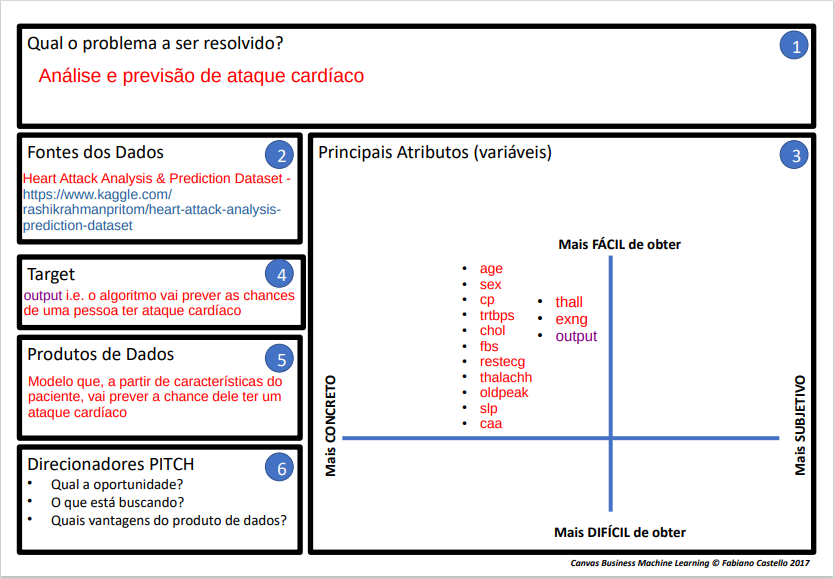

In [3]:
from IPython.display import display, Image
display(Image(filename='C:/Users/iuryv/Desktop/Capturar.png'))

In [46]:
print("Dicionário de dados\nage - Idade do paciente\nsex - Sexo do paciente\ncp - Tipo de dor no peito(0 - Angina tipica, 1 - Angina atipica, 2 - Sem dor Anginal, 3 - Assintomatico)\ntrtbps - Pressão sanguínea em repouso (em mmHg)\nchol - Colesterol sérico em mg/dl\nfbs - Açúcar no sangue em jejum > 120 mg/dl (0 - falso, 1 - verdadeiro)\nrestecg - Resultados eletrocardiográficos em repouso (0 - normal, 1 - normalidade da onda ST-T, 2 - hipertrofia ventricular esquerda)\ntalachh - Frequência cardíaca máxima alcançada\noldpeak - depressão de ST induzida por exercício em relação ao repouso\nslp - Inclinação do segmento ST(0 - Inclinação para cima, 1 - Normal, 2 - Inclinação para baixo)\ncaa - número de vasos principais (0-3) colorido por fluorosopia\nthall - Resultado do teste de estresse de tálio\nexng - Angina induzida por exercício (1 = Sim, 0 = Não)")

Dicionário de dados
age - Idade do paciente
sex - Sexo do paciente
cp - Tipo de dor no peito(0 - Angina tipica, 1 - Angina atipica, 2 - Sem dor Anginal, 3 - Assintomatico)
trtbps - Pressão sanguínea em repouso (em mmHg)
chol - Colesterol sérico em mg/dl
fbs - Açúcar no sangue em jejum > 120 mg/dl (0 - falso, 1 - verdadeiro)
restecg - Resultados eletrocardiográficos em repouso (0 - normal, 1 - normalidade da onda ST-T, 2 - hipertrofia ventricular esquerda)
talachh - Frequência cardíaca máxima alcançada
oldpeak - depressão de ST induzida por exercício em relação ao repouso
slp - Inclinação do segmento ST(0 - Inclinação para cima, 1 - Normal, 2 - Inclinação para baixo)
caa - número de vasos principais (0-3) colorido por fluorosopia
thall - Resultado do teste de estresse de tálio
exng - Angina induzida por exercício (1 = Sim, 0 = Não)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/iuryv/Documents/archive2/heart.csv")

In [3]:
print("Forma do dataset: ", df.shape)

Forma do dataset:  (303, 14)


In [39]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [41]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["Contagem de dados únicos"]).transpose()

,Contagem de dados únicos
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [6]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("Colunas do tipo categoria: ", cat_cols)
print("Colunas do tipo contínua: ", con_cols)
print("Variável alvo: ", target_col)

Colunas do tipo categoria:  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
Colunas do tipo contínua:  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
Variável alvo:  ['output']


In [7]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

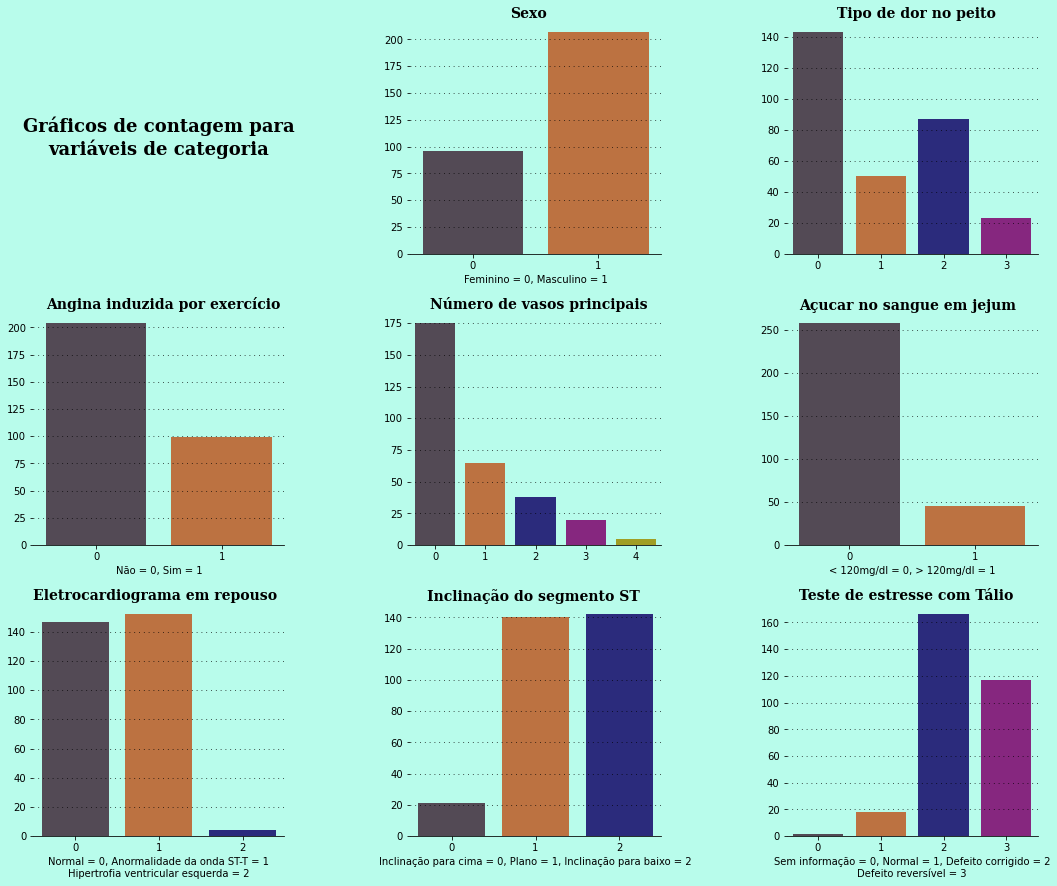

In [9]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#b8fceb"
color_palette = ["#544857","#d16e2c","#1d1d8a","#96178c","#b5b210"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 

ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Gráficos de contagem para\nvariáveis de categoria',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax1.text(0.3, 220, 'Sexo', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
ax1.set_xlabel("Feminino = 0, Masculino = 1")
ax1.set_ylabel("")

ax2.text(0.3, 152, 'Tipo de dor no peito', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.countplot(ax=ax2, data=df, x='cp', palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

ax3.text(-0.4, 217, 'Angina induzida por exercício', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='exng',palette=color_palette)
ax3.set_xlabel("Não = 0, Sim = 1")
ax3.set_ylabel("")

ax4.text(-0.1, 186, 'Número de vasos principais', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='caa',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

ax5.text(-0.4, 274, 'Açucar no sangue em jejum', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs',palette=color_palette)
ax5.set_xlabel("< 120mg/dl = 0, > 120mg/dl = 1")
ax5.set_ylabel("")

ax6.text(-0.5, 162, 'Eletrocardiograma em repouso', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='restecg',palette=color_palette)
ax6.set_xlabel("Normal = 0, Anormalidade da onda ST-T = 1\nHipertrofia ventricular esquerda = 2")
ax6.set_ylabel("")

ax7.text(-0.3, 151, 'Inclinação do segmento ST', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp',palette=color_palette)
ax7.set_xlabel("Inclinação para cima = 0, Plano = 1, Inclinação para baixo = 2")
ax7.set_ylabel("")

ax8.text(-0.3, 177, 'Teste de estresse com Tálio', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall',palette=color_palette)
ax8.set_xlabel("Sem informação = 0, Normal = 1, Defeito corrigido = 2\nDefeito reversível = 3")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

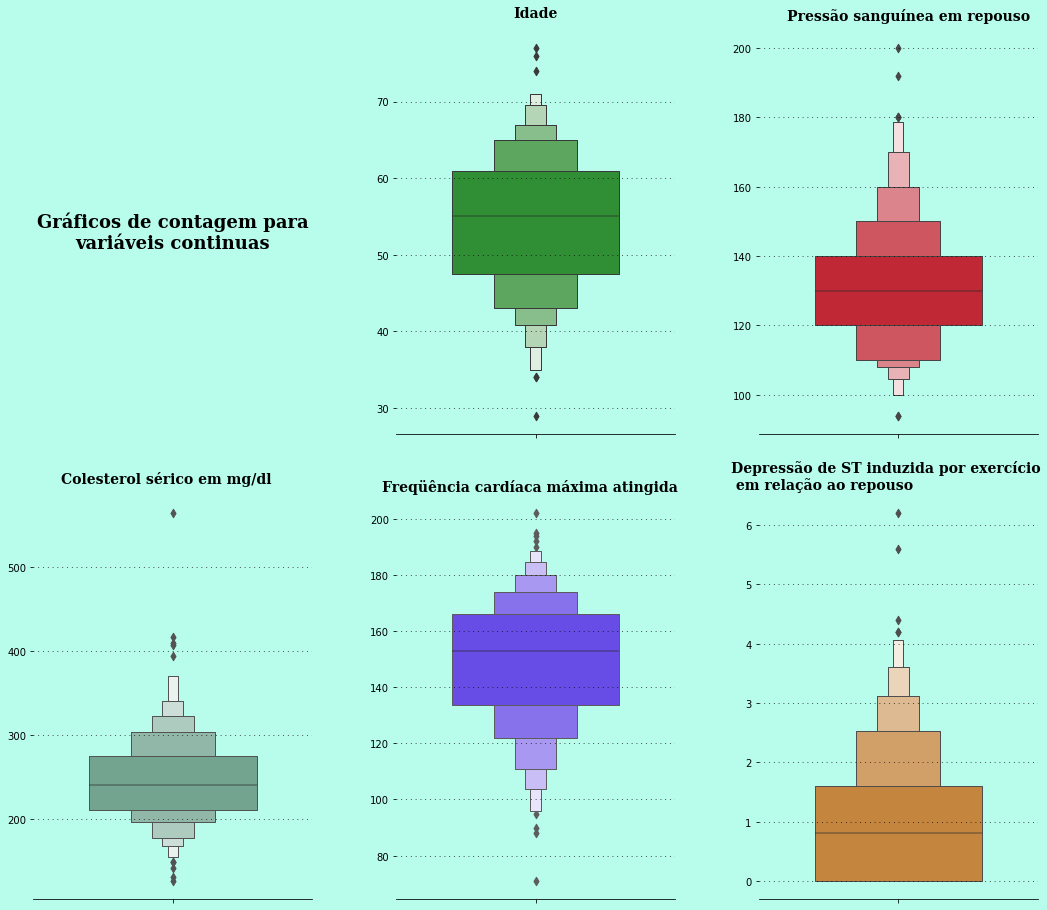

In [10]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#b8fceb"
color_palette = ["#544857","#d16e2c","#1d1d8a","#96178c","#b5b210"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 

ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Gráficos de contagem para\nvariáveis continuas',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax1.text(-0.08, 81, 'Idade', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['age'],palette=["#209e26"], width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

ax2.text(-0.4, 208, 'Pressão sanguínea em repouso', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['trtbps'],palette=["#d90f20"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")
 
ax3.text(-0.4, 600, 'Colesterol sérico em mg/dl', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['chol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

ax4.text(-0.55, 210, 'Freqüência cardíaca máxima atingida', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['thalachh'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

ax5.text(-0.6, 6.6, 'Depressão de ST induzida por exercício\n em relação ao repouso', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

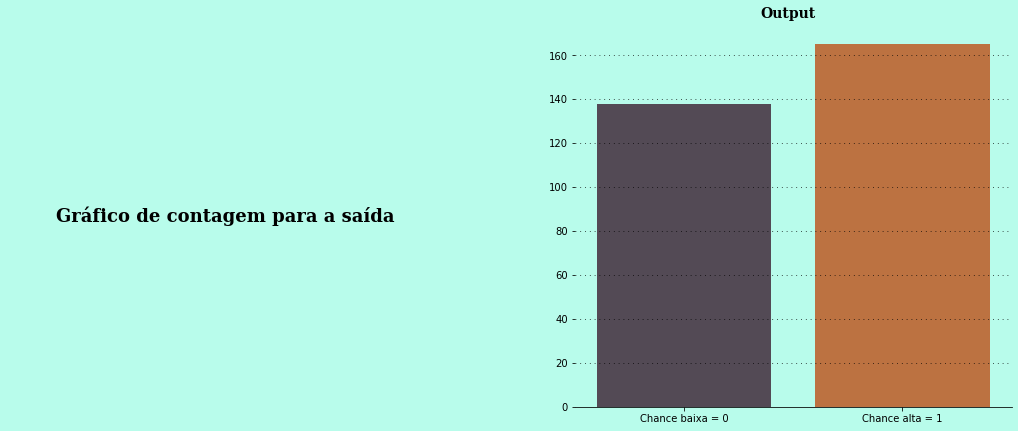

In [11]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#b8fceb"
color_palette = ["#544857","#d16e2c","#1d1d8a","#96178c","#b5b210"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

ax0.text(0.5,0.5,"Gráfico de contagem para a saída",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

ax1.text(0.35,177,"Output",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'output',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Chance baixa = 0","Chance alta = 1"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

In [42]:
df_corr = df[con_cols].corr()
df_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


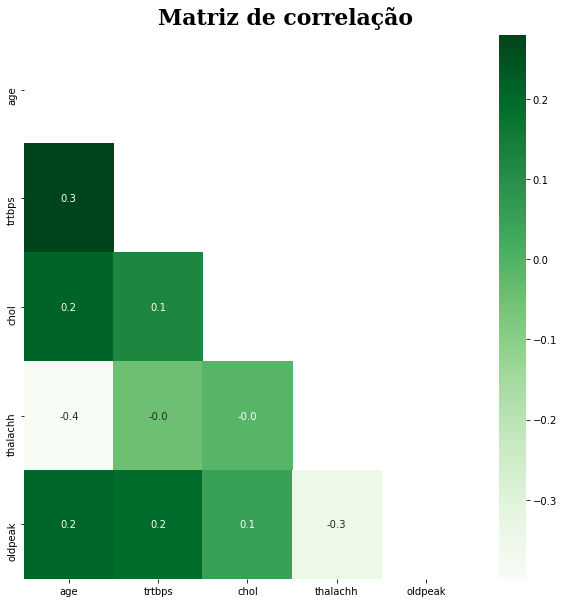

In [13]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#b81d2d","#b81d2d"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Matriz de correlação",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = df[con_cols].corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='Greens')
plt.show()

<Figure size 864x864 with 0 Axes>

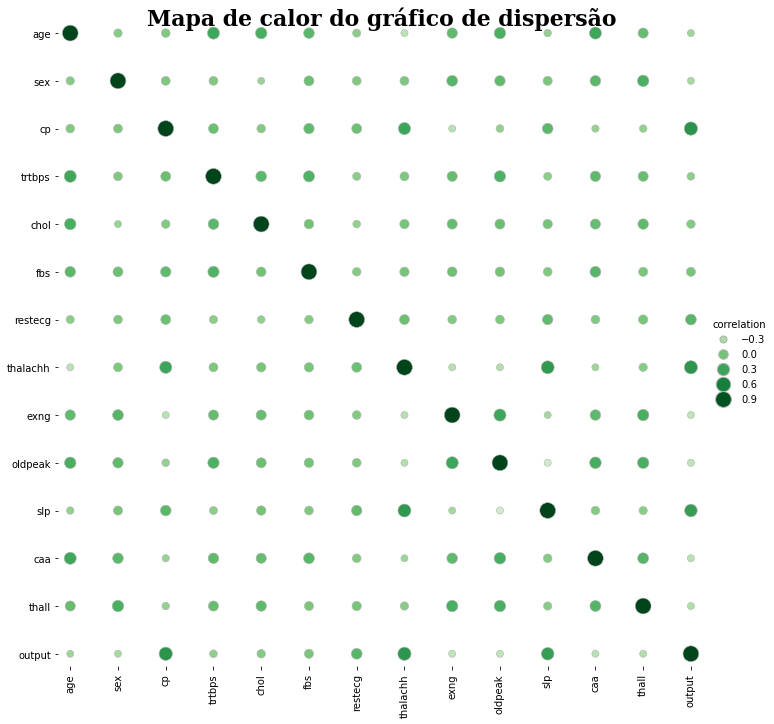

In [14]:
fig = plt.figure(figsize=(12,12))
corr_mat = df.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="Greens", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="", ylabel="", aspect="equal")
g.fig.suptitle('Mapa de calor do gráfico de dispersão',fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

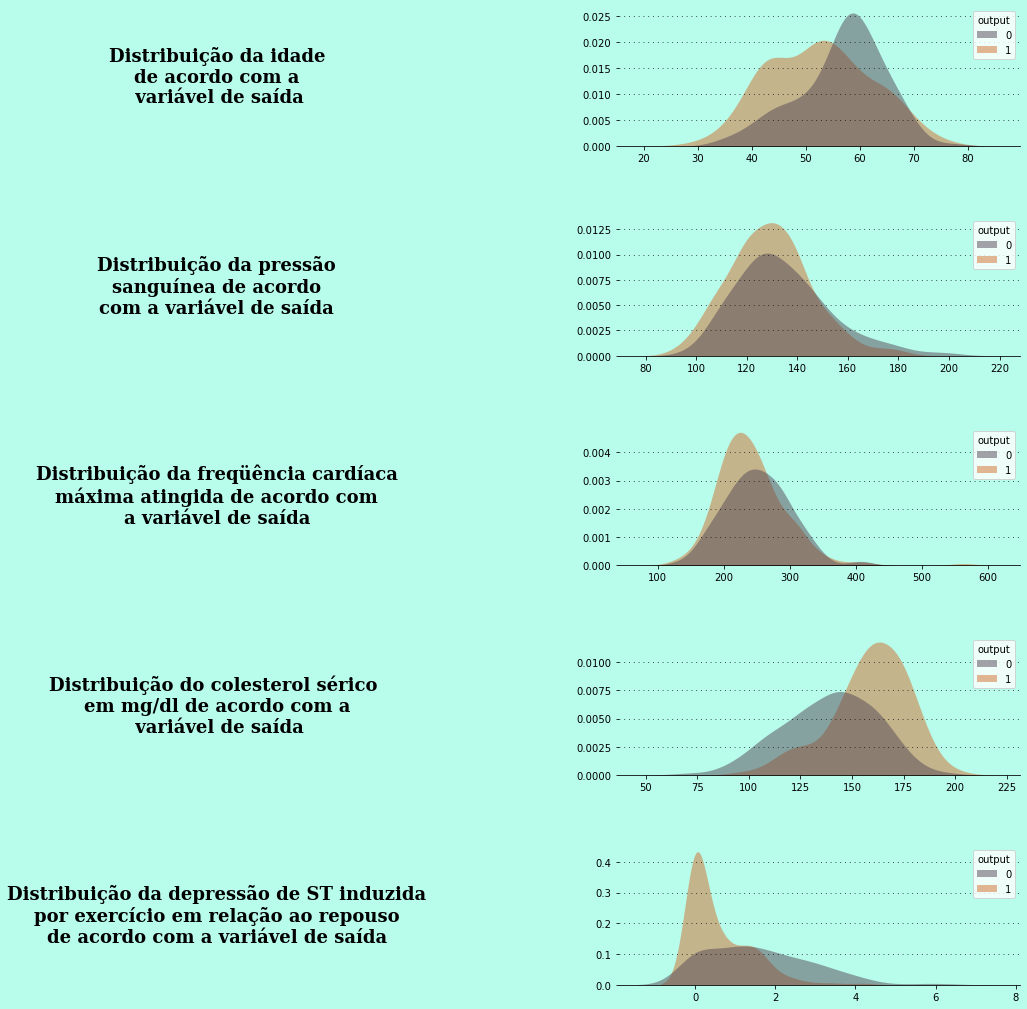

In [15]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#b8fceb"
color_palette = ["#544857","#d16e2c","#1d1d8a","#96178c","#b5b210"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribuição da idade\nde acordo com a\n variável de saída",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='age',hue="output", fill=True,palette=["#544857","#d16e2c"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# TrTbps title
ax2.text(0.5,0.5,"Distribuição da pressão\nsanguínea de acordo\ncom a variável de saída",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='trtbps',hue="output", fill=True,palette=["#544857","#d16e2c"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribuição da freqüência cardíaca\nmáxima atingida de acordo com\na variável de saída",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='chol',hue="output", fill=True,palette=["#544857","#d16e2c"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thalachh title
ax6.text(0.5,0.5,"Distribuição do colesterol sérico \nem mg/dl de acordo com a\n variável de saída",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thalachh',hue="output", fill=True,palette=["#544857","#d16e2c"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribuição da depressão de ST induzida\npor exercício em relação ao repouso\nde acordo com a variável de saída",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='oldpeak',hue="output", fill=True,palette=["#544857","#d16e2c"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

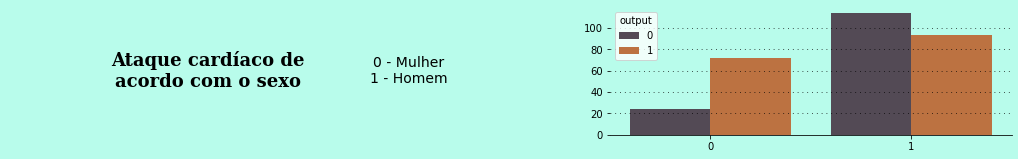

In [16]:
fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#b8fceb"
color_palette = ["#544857","#d16e2c","#1d1d8a","#96178c","#b5b210"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Sex title
ax0.text(0.5,0.5,"Ataque cardíaco de\nacordo com o sexo",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.text(1,.5,"0 - Mulher\n1 - Homem",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Sex
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',palette=["#544857","#d16e2c"], hue='output')
ax1.set_xlabel("")
ax1.set_ylabel("")


for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)

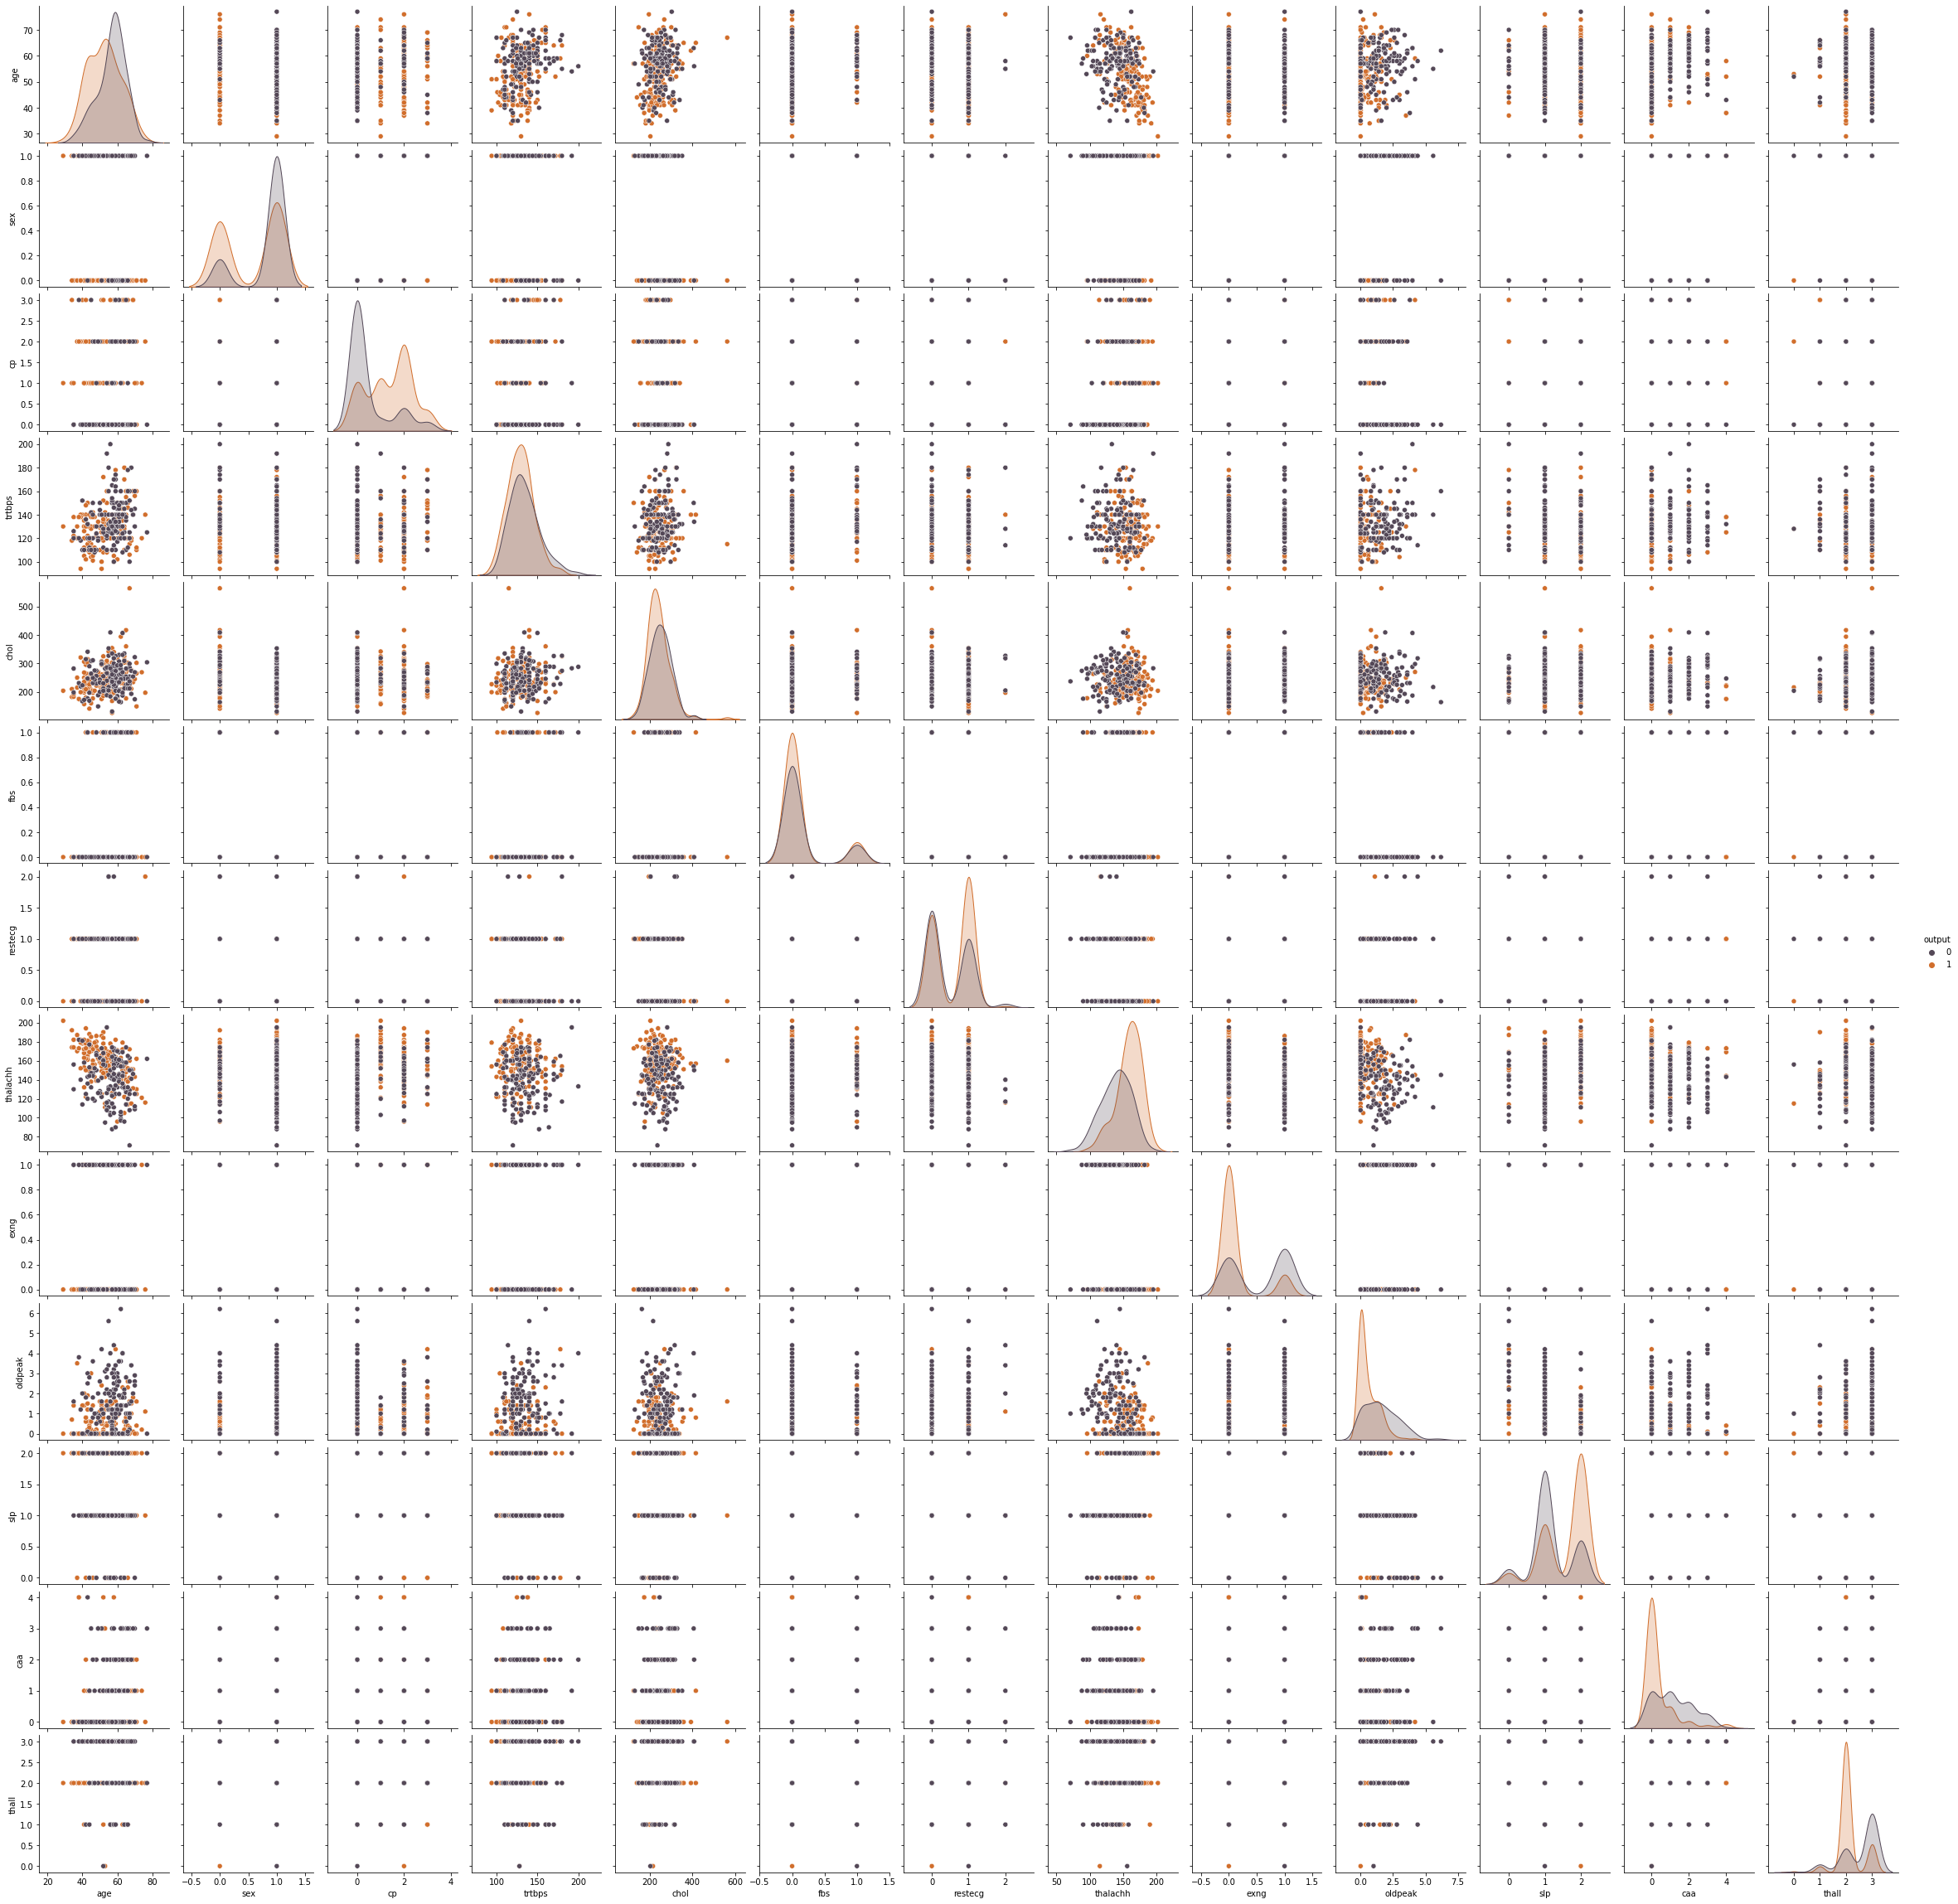

In [198]:
sns.pairplot(df,hue='output',palette = ["#544857","#d16e2c"])
plt.show()

In [45]:
print("4.1 Conclusões da EDA\n1. Não há valores NaN nos dados.\n2. Os dados consistem emo dobro de homens em relação as mulheres.\n3. Não há correlação linear aparente entre as variáveis contínuas de acordo com o mapa de calor.\n4. A matriz de mapa de calor do gráfico de dispersão sugere que pode haver alguma correlação entre a saída e cp, thalachh e slp.\n5. É intuitivo que os idosos possam ter maiores chances de ataque cardíaco, mas de acordo com o gráfico de distribuição da produção por idade, é evidente que este não é o caso.\n6. De acordo com o gráfico de distribuição da produção de thalachh wrt, pessoas com maior freqüência cardíaca máxima alcançada têm maiores chances de ataque cardíaco.\n7. De acordo com o gráfico de distribuição da produção do pico antigo, as pessoas com pico anterior mais baixo alcançado têm maiores chances de ataque cardíaco.\n8. Pessoas com dor torácica não anginosa, ou seja, com cp = 2, têm maiores chances de ataque cardíaco.\n9. Pessoas com 0 vasos principais, ou seja, com caa = 0, têm alta chance de ataque cardíaco.\n10. Pessoas com sexo masculino têm maior chance de ataque cardíaco.\n11. Pessoas com thall = reversivel têm uma chance muito maior de ataque cardíaco.\n12. Pessoas sem angina induzida por exercício, ou seja, com exng = 0, têm maior chance de ataque cardíaco.")

4.1 Conclusões da EDA
1. Não há valores NaN nos dados.
2. Os dados consistem emo dobro de homens em relação as mulheres.
3. Não há correlação linear aparente entre as variáveis contínuas de acordo com o mapa de calor.
4. A matriz de mapa de calor do gráfico de dispersão sugere que pode haver alguma correlação entre a saída e cp, thalachh e slp.
5. É intuitivo que os idosos possam ter maiores chances de ataque cardíaco, mas de acordo com o gráfico de distribuição da produção por idade, é evidente que este não é o caso.
6. De acordo com o gráfico de distribuição da produção de thalachh wrt, pessoas com maior freqüência cardíaca máxima alcançada têm maiores chances de ataque cardíaco.
7. De acordo com o gráfico de distribuição da produção do pico antigo, as pessoas com pico anterior mais baixo alcançado têm maiores chances de ataque cardíaco.
8. Pessoas com dor torácica não anginosa, ou seja, com cp = 2, têm maiores chances de ataque cardíaco.
9. Pessoas com 0 vasos principais, ou seja, c

In [17]:
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, roc_curve

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [18]:
df1 = df

# Difine as colunas que serão codificadas e escaladas
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# Codificando as colunas do tipo categoria
df1 = pd.get_dummies(df1, columns = cat_cols)

# Definindo os recursos e a variavel alvo
X = df1.drop(['output'],axis=1)
y = df1[['output']]

scaler = RobustScaler()

# Escalando os recursos continuos
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head(10)

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,exng_0,exng_1,caa_0,...,restecg_0,restecg_1,restecg_2,slp_0,slp_1,slp_2,thall_0,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,0,1,1,0,1,...,1,0,0,1,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,0,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
5,0.148148,0.50,-0.755906,-0.153846,-0.2500,0,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0
6,0.074074,0.50,0.850394,0.000000,0.3125,1,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
7,-0.814815,-0.50,0.362205,0.615385,-0.5000,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
8,-0.222222,2.10,-0.645669,0.276923,-0.1875,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
9,0.148148,1.00,-1.133858,0.646154,0.5000,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("shape de X_train: ", X_train.shape)
print("shape de X_test: ",X_test.shape)
print("shape de y_train: ",y_train.shape)
print("shape de y_test: ",y_test.shape)

shape de X_train:  (242, 30)
shape de X_test:  (61, 30)
shape de y_train:  (242, 1)
shape de y_test:  (61, 1)


In [38]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

# Calcula probabilidade
y_pred_proba = logreg.predict_proba(X_test)

# Achando valor previsto
y_pred = np.argmax(y_pred_proba,axis=1)

print("Teste de pontos de precisão da regressão logistica: ", accuracy_score(y_test, y_pred))

Teste de pontos de precisão da regressão logistica:  0.8852459016393442
